In [ ]:
# install bitenet
#!python3 -m pip install https://gitlab.com/pp_lab/bitenet.git --user

In [1]:
import os
from bitenet import BiteNet, read_predictions
from bitenet.clustering import *
from IPython.display import Image, display
import pandas as pd
import numpy as np

In [2]:
model = BiteNet()
folder_data = "./data/"

## Single pdb files

In [3]:
predictions, _ = model(os.path.join(folder_data, "5d41.pdb"))
print("score_threshold = 0.1")
for i, p in enumerate(predictions):
    print("{i:2d} {p[0]:.3f} {p[1]:7.3f} {p[2]:7.3f} {p[3]:7.3f}".format(i=i, p=p))
    
print("-"*40)
# changing score threshold
model.prediction_processer.score_threshold = 0.01
predictions, _ = model(os.path.join(folder_data, "5d41.pdb"))
print("score_threshold = 0.01")
for i, p in enumerate(predictions):
    print("{i:2d} {p[0]:.3f} {p[1]:7.3f} {p[2]:7.3f} {p[3]:7.3f}".format(i=i, p=p))
model.prediction_processer.score_threshold = 0.1

score_threshold = 0.1
 0 0.674 -47.556  33.437 -14.395
 1 0.562 -32.635  36.249  13.507
 2 0.319 -25.500  32.152  13.068
----------------------------------------
score_threshold = 0.01
 0 0.674 -47.556  33.437 -14.395
 1 0.562 -32.635  36.249  13.507
 2 0.319 -25.500  32.152  13.068
 3 0.053 -51.410  31.130  14.569
 4 0.029 -59.786  30.963 -24.479
 5 0.015 -49.304  33.332 -29.843
 6 0.014 -26.965  30.944 -16.910


### Getting neighbor residues

In [4]:
model.prediction_processer.residues = True

predictions, residues = model(os.path.join(folder_data, "5d41.pdb"))
for i, p in enumerate(predictions):
    print("{i:2d} {p[0]:.3f} {p[1]:7.3f} {p[2]:7.3f} {p[3]:7.3f} {r:s}".format(i=i, p=p, r=";".join(residues[i])))

 0 0.674 -47.556  33.437 -14.395 B_726_VAL;B_743_ALA;B_745_LYS;B_790_MET;B_842_ASN;B_844_LEU;B_854_THR;B_855_ASP
 1 0.562 -32.635  36.249  13.507 A_718_LEU;A_726_VAL;A_796_GLY;A_797_CYS;A_841_ARG;A_844_LEU
 2 0.319 -25.500  32.152  13.068 A_745_LYS;A_777_LEU;A_788_LEU;A_790_MET;A_854_THR;A_855_ASP;A_856_PHE;A_858_LEU


### Adding additional rotations

In [5]:
# without rotations
predictions, residues = model(os.path.join(folder_data, "5yve_3.pdb"))
print("Single orientation")
for i, p in enumerate(predictions):
    print("{i:2d} {p[0]:.3f} {p[1]:7.3f} {p[2]:7.3f} {p[3]:7.3f}".format(i=i, p=p))

print("-"*40)
    
# with rotations
# WARNING: memory consumption can be too high
model.dataloader.rotation_eval = True
predictions, residues = model(os.path.join(folder_data, "5yve_3.pdb"))
print("Additional 50 orientations")
for i, p in enumerate(predictions):
    print("{i:2d} {p[0]:.3f} {p[1]:7.3f} {p[2]:7.3f} {p[3]:7.3f}".format(i=i, p=p))
model.dataloader.rotation_eval = False

Single orientation
 0 0.311   7.045  17.239 -46.880
 1 0.217  -1.816  18.617 -27.482
 2 0.200   8.905   3.340 -23.344
 3 0.194 -17.015 -14.035 -27.500
 4 0.185 -18.765  -2.530 -46.616
 5 0.180  10.112 -15.574 -46.437
----------------------------------------
Additional 50 orientations
 0 0.708  12.404 -17.738 -46.954
 1 0.635   8.441  18.091 -44.972
 2 0.604 -18.163  -1.453 -46.391
 3 0.463  -2.399  19.744 -24.261
 4 0.394   8.629   2.429 -23.666
 5 0.352  -6.375   5.674 -24.239
 6 0.349 -16.244 -11.374 -24.567
 7 0.331  17.149  -7.599 -25.728
 8 0.169  -0.796  -5.892 -25.823
 9 0.143   3.449   1.286 -75.226
10 0.130  23.765  -6.932 -30.301
11 0.129   0.087  19.860 -32.015
12 0.116  -0.852  11.560 -90.348
13 0.114  12.887   6.701 -88.665
14 0.112  -5.478   7.727 -69.707
15 0.100  -6.833  -6.724 -95.639


### Running pymol scripts

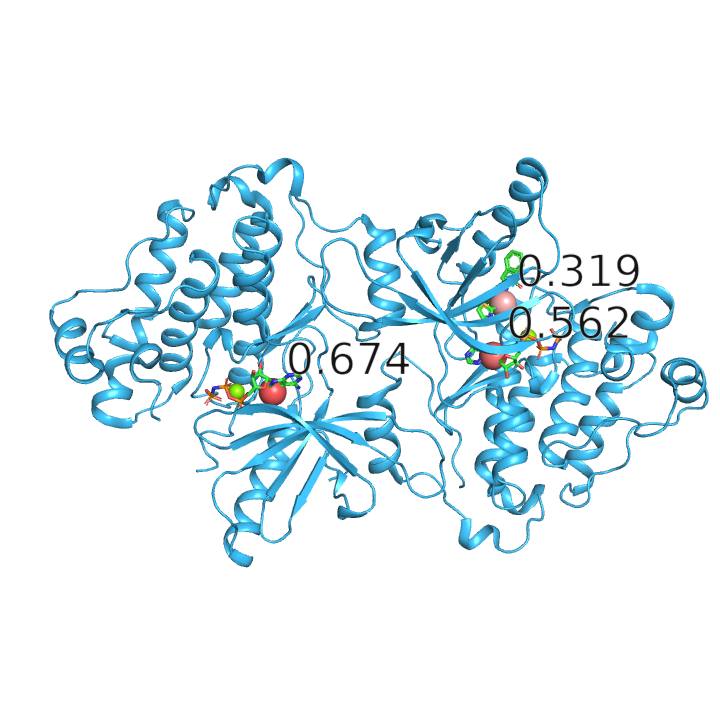

In [6]:
# look into pymol_predict.py script for more details
!pymol ./pymol_predict.py -Q -- "./data/5d41.pdb" "./data/5d41_predictions_0.png"
Image(filename="./data/5d41_predictions_0.png", width=480) 

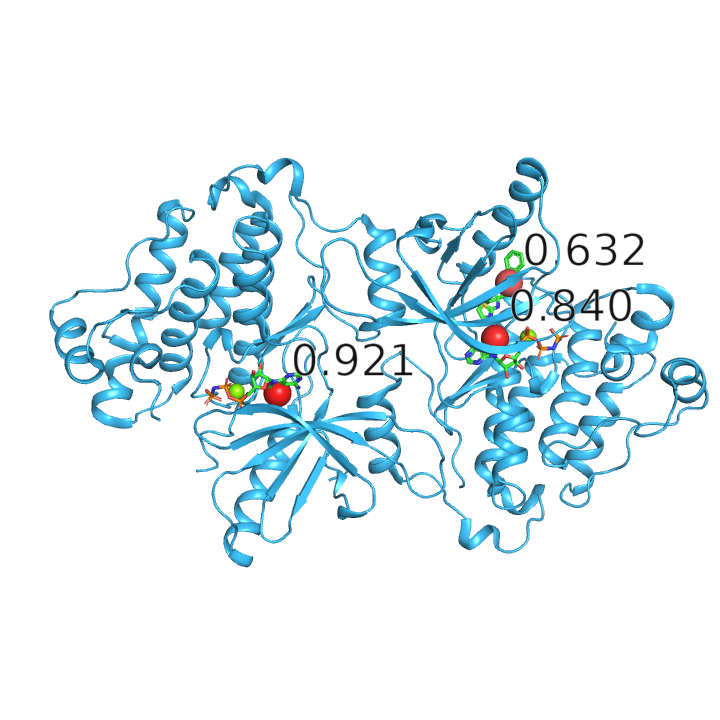

In [7]:
!pymol ./pymol_predict.py -Q -- "./data/5d41.pdb" "./data/5d41_predictions_1.png" --rotations --score_threshold 0.3
Image(filename="./data/5d41_predictions_1.png", width=480) 

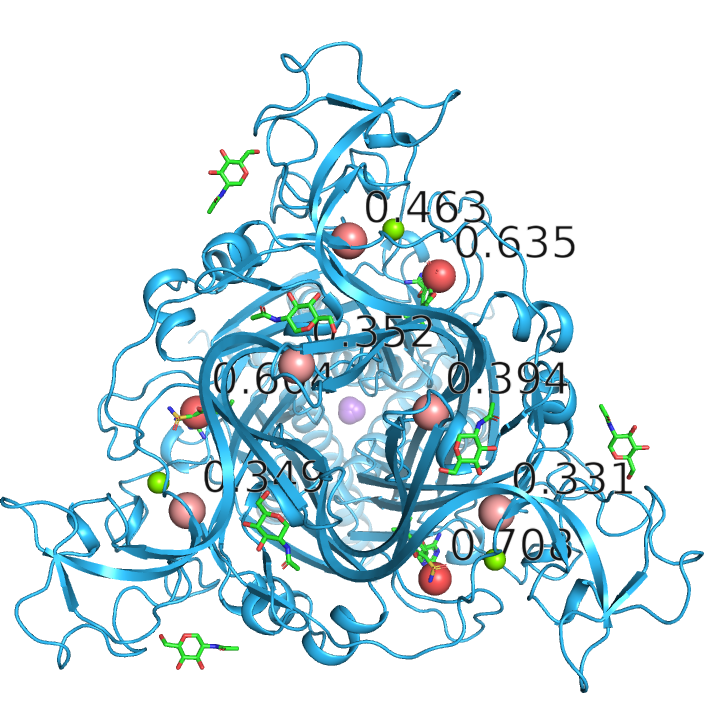

In [8]:
!pymol ./pymol_predict.py -Q -- "./data/5yve_3.pdb" "./data/5yve_3_predictions.png" --rotations --score_threshold 0.2
Image(filename="./data/5yve_3_predictions.png", width=480) 

## Trajectory

In [9]:
# unzip archive with protein trajectory frames
!unzip -qq ./data/10488_trj_47.zip -d ./data/ 

# Trajectory of adenosine a2a receptor from GPCRMD database (GPCRMD ID: 47:10488)

# run prediction on folder with frames
folder_traj = "./data/10488_trj_47/"
filename_predictions = "./data/predictions_47_10488.log"
_, predictions, residues = model(folder_traj, out=filename_predictions)

100%|██████████| 2500/2500 [04:58<00:00,  8.36it/s]


In [ ]:
# or read predictions file
_, predictions, residues = read_predictions(filename_predictions, get_residues=True)

--------------------------------------------------------------------------------
Cluster scores
  0   0 0.258 0.212  2054  2052 0.736  2054   -2.14    8.66  -16.75
  1   1 0.214 0.128  1666  1496 0.672   299   -3.55    7.05    7.87
  2   2 0.189 0.068   912   894 0.573   468    0.28   -1.58    6.88
  3   3 0.146 0.020   347   347 0.392  2370   12.29   14.52    5.73
  4   4 0.164 0.006    89    88 0.419   371  -10.57    5.65   23.17
  5   5 0.144 0.003    51    51 0.372  2330    3.94   -7.96  -17.07
  6   7 0.122 0.003    54    54 0.243  1731  -17.48   -0.74    7.58
  7   6 0.131 0.002    40    40 0.222  2268  -15.20   -1.31  -13.58
  8   8 0.148 0.002    28    28 0.271  1552   -5.86   -9.00  -19.28

--------------------------------------------------------------------------------


,index,cluster_index,cluster_score,cluster_score_mean,predictions_num,steps_num,score_max,score_max_step,cluster_center_x,cluster_center_y,cluster_center_z
0,0,0,0.258450,0.212136,2054,2052,0.736168,2054,-2.140338,8.659216,-16.751379
1,1,1,0.213851,0.127969,1666,1496,0.672413,299,-3.553467,7.050546,7.872814
2,2,2,0.189256,0.067678,912,894,0.573119,468,0.275258,-1.578224,6.876923
3,3,3,0.146223,0.020296,347,347,0.392339,2370,12.290698,14.521848,5.729961
4,4,4,0.164186,0.005779,89,88,0.419077,371,-10.565227,5.650243,23.167269
5,5,5,0.143781,0.002933,51,51,0.371685,2330,3.936046,-7.959950,-17.066735
6,6,7,0.122099,0.002637,54,54,0.242647,1731,-17.478665,-0.738023,7.584647
7,7,6,0.131269,0.002100,40,40,0.221778,2268,-15.198812,-1.313135,-13.584650
8,8,8,0.148356,0.001662,28,28,0.271034,1552,-5.864528,-8.995062,-19.284766


--------------------------------------------------------------------------------
Cluster residues
0 _290_TYR;_299_PHE;_26_LEU;_23_GLY;_285_PRO;_286_PHE;_27_VAL;_289_ALA;_22_LEU;_282_VAL;_296_ARG;_303_ILE;_295_PHE;_19_LEU;_24_ASN
1 _168_PHE;_278_HSD;_62_PHE;_167_LEU;_274_ILE;_166_CYS;_169_GLU;_84_VAL;_13_GLU;_59_ALA;_277_SER;_66_ILE;_249_LEU;_9_TYR;_63_ALA;_69_GLY;_55_VAL;_246_TRP;_70_PHE;_60_ILE;_88_THR;_68_THR;_157_GLN;_58_LEU;_281_SER;_65_THR;_165_ALA;_153_LYS;_67_SER;_177_MET;_80_ILE;_77_CYS;_279_THR;_253_ASN;_85_LEU;_170_ASP
2 _253_ASN;_250_HSD;_249_LEU;_186_VAL;_177_MET;_181_ASN;_246_TRP;_182_PHE;_251_ILE;_88_THR;_169_GLU;_247_LEU;_85_LEU;_185_CYS;_254_CYS;_257_PHE;_168_PHE;_277_SER;_84_VAL
3 _9_TYR;_271_TYR;_5_GLY;_4_MET;_6_SER;_268_TRP;_8_VAL;_2_PRO;_267_LEU;_3_ILE;_272_LEU
4 _165_ALA;_147_GLY;_164_VAL;_74_CYS;_148_GLN;_149_PRO
5 _102_ARG
6 
7 
8 
--------------------------------------------------------------------------------


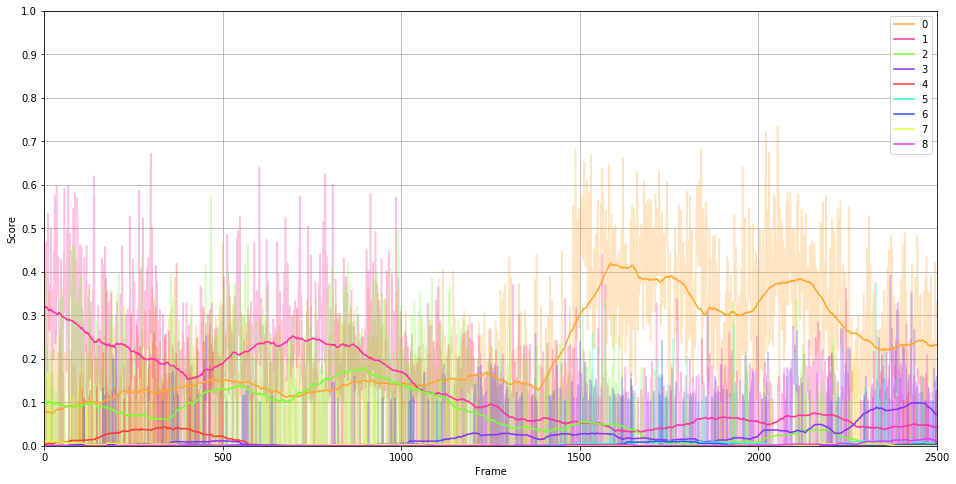

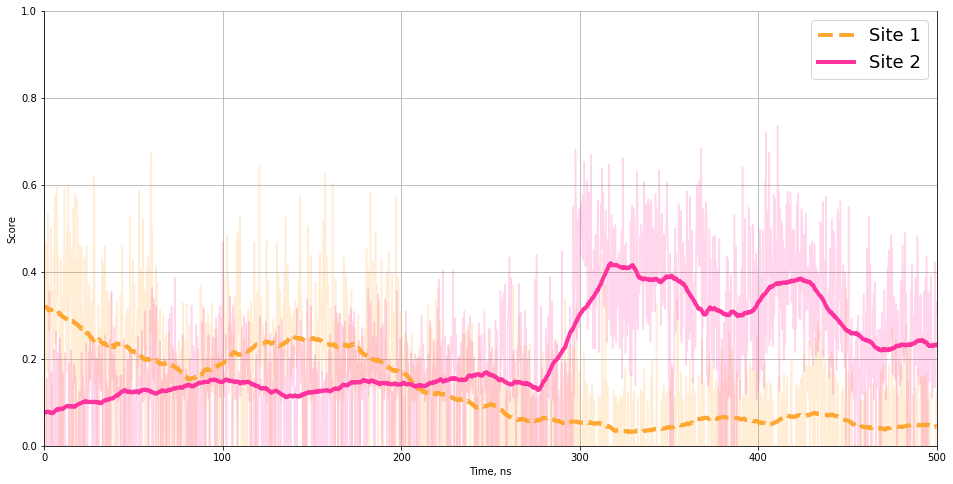

In [10]:
# init clustering object
clustering = Clustering_MeanShift()
# fit to predictions
clustering.cluster(predictions, residues)
# prints cluster scores
print("-"*80)
print("Cluster scores")
print(clustering.get_summary_str())
print("-"*80)
# writes csv file with cluster scores
filename_csv = "./data/clusters.csv"
clustering.export_summary(filename_csv)
d = pd.read_csv(filename_csv)
display(d)
# get neighbor residues for each cluster
print("-"*80)
print("Cluster residues")
for i, r in enumerate(clustering.get_cluster_residues()):
    print(i, ";".join(r))
print("-"*80)
    
# draw plot with cluster scores through trajectory
clustering.plot()

# or draw custom plot
fig, ax = plt.subplots(figsize=(16, 8))
plt.rc("font", size=18)
linewidth = 4
steps = np.arange(len(predictions))*0.2
ax.plot(steps, clustering.cluster_scores_steps[:, clustering.cluster_indexes[1]], 
        alpha=0.2, color=colors_all[1])
ax.plot(steps, clustering.cluster_scores_steps[:, clustering.cluster_indexes[0]], 
        alpha=0.2, color=colors_all[2])
ax.set_yticks(np.arange(0, 1.01, 0.2))
ax.set_ylabel("Score")
ax.spines['top'].set_visible(False)
plt.xlim(0, len(steps)*0.2)
plt.xlabel("Time, ns")
plt.grid(True)
plt.ylim(0, 1)
def m_a(a, n=100):
    res = np.zeros_like(a)
    for i in range(len(a)):
        res[i] = np.mean(a[max(i - n//2, 0) : i + n//2], axis=0)
    return res
ax.plot(steps, m_a(clustering.cluster_scores_steps[:, clustering.cluster_indexes[1]], 200), 
        color=colors_all[1], label="Site 1", linewidth=linewidth, linestyle="--")
ax.plot(steps, m_a(clustering.cluster_scores_steps[:, clustering.cluster_indexes[0]], 200),
       color=colors_all[2], label="Site 2",  linewidth=linewidth, linestyle="-")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.show()

### Pymol visualization of clusters

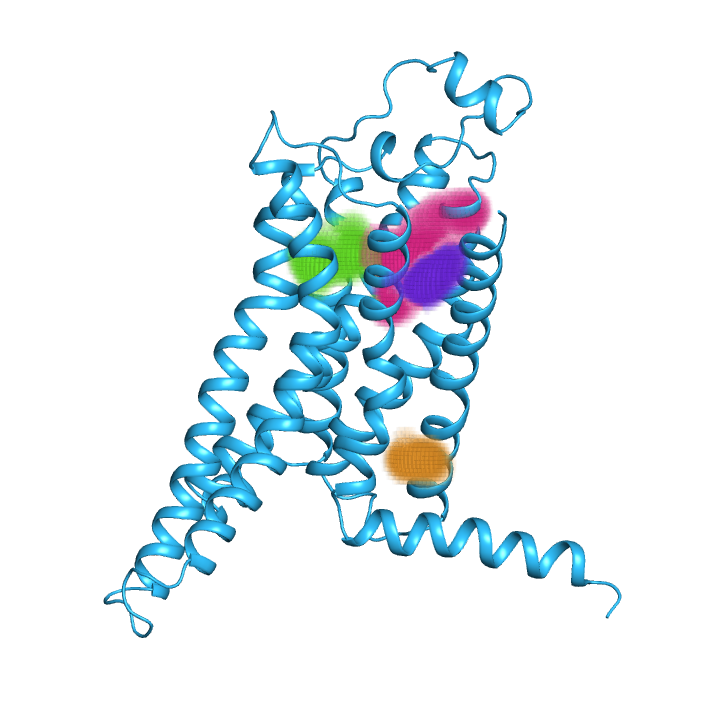

In [11]:
# MeanShift
!pymol pymol_cluster.py -Q -- ./data/10488_trj_47/ ./data/predictions_47_10488.log ./data/meanshift.png \
    --method meanshift --distance_merge 5 --cluster_score_threshold_mean 0.01 --density
Image(filename="./data/meanshift.png", width=480)

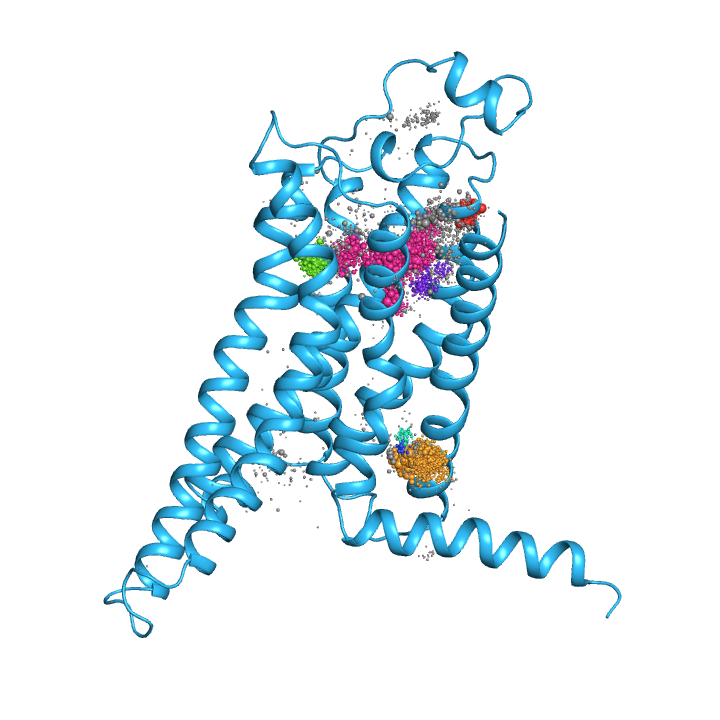

In [12]:
# DBSCAN
!pymol pymol_cluster.py -Q -- ./data/10488_trj_47/ ./data/predictions_47_10488.log ./data/dbscan.png --method dbscan --eps 1
Image(filename="./data/dbscan.png", width=480)

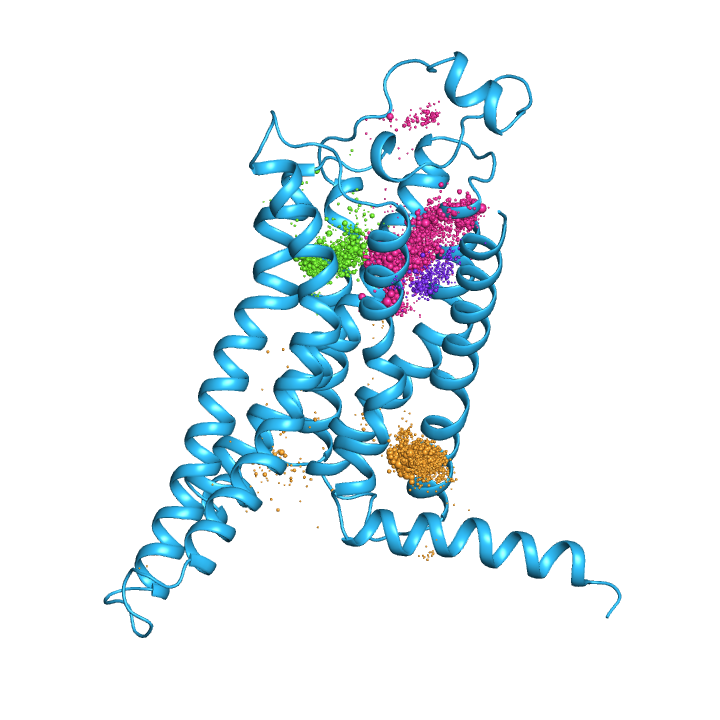

In [13]:
# Agglomerative clustering on predictions coordinates
!pymol pymol_cluster.py -Q -- ./data/10488_trj_47/ ./data/predictions_47_10488.log ./data/agg_coords.png --method agglomerative --n_clusters 4
Image(filename="./data/agg_coords.png", width=480)

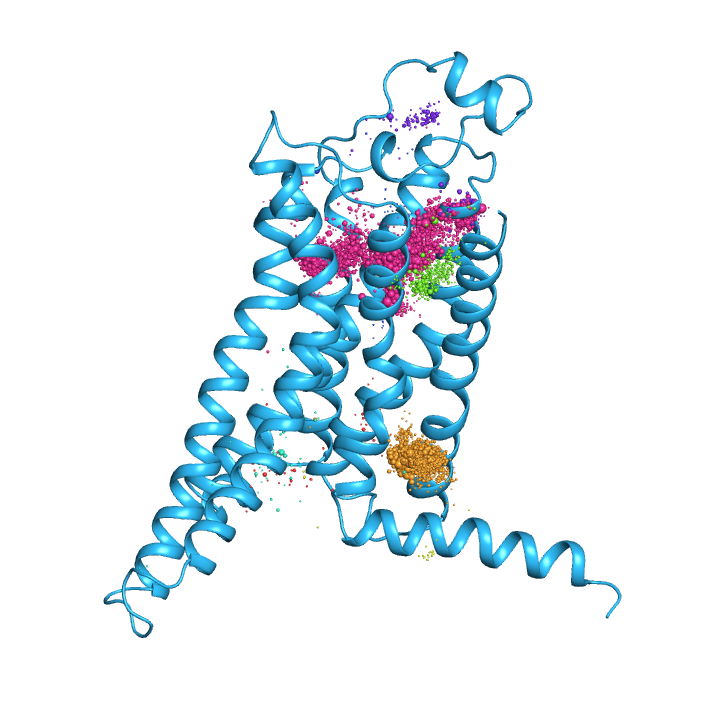

In [14]:
# Agglomerative clustering on residues
!pymol pymol_cluster.py -Q -- ./data/10488_trj_47/ ./data/predictions_47_10488.log ./data/agg_residues.png --method agglomerative_residues --n_clusters 8
Image(filename="./data/agg_residues.png", width=480)

## Running command line scripts

In [1]:
# prediction for single pdb
# possibly you have to restart or stop current notebook, if you need to run on gpu, 
#    as gpu memory is occupied by current initialized model
# or run these commands from command line
!bitenet ./data/5d41.pdb ./data/5d41_predictions.log
# help 
!bitenet -h

usage: bitenet [-h] [--separate] [--model MODEL] [--gpus GPUS] [--cpu_only]
               [--minibatch_size MINIBATCH_SIZE]
               [--score_threshold SCORE_THRESHOLD]
               [--distance_threshold DISTANCE_THRESHOLD]
               [--distance_residues DISTANCE_RESIDUES]
               path out

positional arguments:
  path                  path to input pdb file, dataset file or folder
  out                   path to output predictions file or folder

optional arguments:
  -h, --help            show this help message and exit
  --separate            if set, folder will be created and separate output
                        predictions file for each input will be written
  --model MODEL         path to model folder
  --gpus GPUS           visible gpu devices
  --cpu_only            if set, model will run on cpu
  --minibatch_size MINIBATCH_SIZE
                        minibatch size for cnn
  --score_threshold SCORE_THRESHOLD
                        score threshold for 

In [ ]:
# predictions for trajectory
!bitenet ./data/10488_trj_47/ ./data/predictions_47_10488.log

In [16]:
# cluster predictions
!bitenet-cluster ./data/predictions_47_10488.log ./data/clusters/
# help
!bitenet-cluster -h

  0   6 0.259 0.212  2053  2049 0.736  2054   -1.51    8.80  -16.56
  1   0 0.222 0.154  2539  1733 0.672   299   -2.86    4.27    7.77
  2   7 0.148 0.021   357   357 0.442   781   11.42   13.92    5.84
  3   1 0.183 0.011   147   147 0.624   787   -9.14    7.52   19.22
  4   4 0.142 0.004    66    66 0.372  2330    3.42   -7.25  -16.52
  5   9 0.129 0.002    41    41 0.222  2268  -14.72   -1.33  -13.65
  6   2 0.139 0.002    31    31 0.271  1552   -8.30  -10.38  -17.69
  7   8 0.122 0.002    32    32 0.243  1731  -15.12    0.15    3.35
  8   3 0.130 0.001    27    27 0.401   207  -14.96    2.94   13.26
  9   5 0.123 0.001    22    22 0.185  2382   -8.70    4.92  -26.02

usage: bitenet-cluster [-h]
                       [--method {meanshift,dbscan,agglomerative,agglomerative_residues}]
                       [--score_threshold SCORE_THRESHOLD]
                       [--cluster_score_threshold_mean CLUSTER_SCORE_THRESHOLD_MEAN]
                       [--distance_merge DISTANCE_MERGE] 

### Train model

In [17]:
!bitenet-train -h

usage: bitenet-train [-h] [--data DATA] [--gpus GPUS] [--restore]
                     [--params PARAMS] [-v VERBOSITY]
                     [--voxel_size VOXEL_SIZE]
                     [--density_cutoff DENSITY_CUTOFF] [--cube_size CUBE_SIZE]
                     [--cell_size CELL_SIZE] [--cube_stride CUBE_STRIDE]
                     path

positional arguments:
  path                  path to model folder

optional arguments:
  -h, --help            show this help message and exit
  --data DATA           path to pdbs folder or pdb list file
  --gpus GPUS           visible gpu devices
  --restore             if set, model will be restored
  --params PARAMS       path to params json file
  -v VERBOSITY, --verbosity VERBOSITY
                        verbosity level
  --voxel_size VOXEL_SIZE
                        grid voxel size
  --density_cutoff DENSITY_CUTOFF
                        grid density cutoff
  --cube_size CUBE_SIZE
                        model input grid cube size
  --

#### please download dataset first https://drive.google.com/open?id=17WhDWL9vGyv2COfJXBDAgs0FaKaz-9Us  and place dataset_5946 to ./data/ folder 

In [ ]:
# to train the default model
# folder for new model will be created at ./data/model/
# train and test splits will be read from ./data/dataset_5946/split_0.txt and pdb files are in ./data/dataset_5946/data/
# dataloader and network parameters will be read from ./data/params.json file
!bitenet-train ./data/model/ --data ./data/dataset_5946/split_0.txt --params ./data/params.json -v 3

In [18]:
# test model
!bitenet-test -h

usage: bitenet-test [-h] [--out OUT] [--model MODEL] [--gpus GPUS]
                    [--cpu_only] [--minibatch_size MINIBATCH_SIZE]
                    [--score_threshold SCORE_THRESHOLD]
                    [--distance_threshold_nms DISTANCE_THRESHOLD_NMS]
                    [--distance_threshold DISTANCE_THRESHOLD]
                    [--num_boxes NUM_BOXES]
                    path

positional arguments:
  path                  path to input dataset file or folder

optional arguments:
  -h, --help            show this help message and exit
  --out OUT             path to output prediction file
  --model MODEL         path to model folder
  --gpus GPUS           visible gpu devices
  --cpu_only            if set, model will run on cpu
  --minibatch_size MINIBATCH_SIZE
                        minibatch size for cnn
  --score_threshold SCORE_THRESHOLD
                        score threshold for predictions
  --distance_threshold_nms DISTANCE_THRESHOLD_NMS
                        dis

In [ ]:
!bitenet-test ./data/dataset_5946/data/ --out ./data/predictions_test.log --model ./data/model/